## Total

In [1]:
import pandas as pd

In [2]:
original = pd.read_csv("data/0_original/train.csv")

original.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [3]:
len(original)

2834

## Whether or not to use each column

**url_legal**
- not use

In [4]:
count = original["url_legal"].isnull().sum()
percent = round(count / len(original) * 100, 2)

print(count, str(percent) + "%")

2004 70.71%


**license**
- not use

In [5]:
count = original["license"].isnull().sum()
percent = round(count / len(original) * 100, 2)

print(count, str(percent) + "%")

2004 70.71%


**excerept**
- use : input

In [6]:
count = original["excerpt"].isnull().sum()
percent = round(count / len(original) * 100, 2)

print(count, str(percent) + "%")

0 0.0%


**target**
- use : output

In [7]:
count = original["target"].isnull().sum()
percent = round(count / len(original) * 100, 2)

print(count, str(percent) + "%")

0 0.0%


**standard_error**
- need to explore
- it can be helpful, if data augmentation is needed.
- it cannot be input, because test data has not standard error data

In [8]:
count = original["standard_error"].isnull().sum()
percent = round(count / len(original) * 100, 2)

print(count, str(percent) + "%")

0 0.0%


**delete**

In [71]:
use_data = original.drop(["url_legal", "license"], axis=1)

In [10]:
use_data.head()

,id,excerpt,target,standard_error
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845


## explore "excerpt"

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
excerpts = use_data["excerpt"]

type(excerpts)

pandas.core.series.Series

**character length**

In [13]:
length = []

for el in excerpts:
    length.append(len(el))

In [14]:
length = np.array(length)

print("Maximum :", np.max(length))
print("Minimum :", np.min(length))

print("Average :", np.mean(length))
print("Variance :", np.var(length))
print("Standard Deviation :", np.std(length))

Maximum : 1341
Minimum : 669
Average : 971.7328863796754
Variance : 13744.487930483208
Standard Deviation : 117.23688809620975


In [15]:
length_sort = np.sort(length)[::-1]

<Figure size 432x288 with 0 Axes>

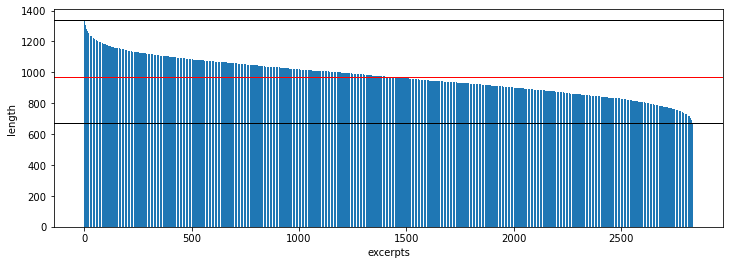

In [16]:
plt.clf()
plt.figure(figsize=(12, 4))

plt.bar(np.arange(len(length)), length_sort)
plt.axhline(y=np.mean(length), linewidth=1, color='red')
plt.axhline(y=np.min(length), linewidth=1, color='black')
plt.axhline(y=np.max(length), linewidth=1, color='black')
plt.xlabel("excerpts")
plt.ylabel("length")

plt.show()

**word length**

In [17]:
length = []

for el in excerpts:
    length.append(len(el.split(" ")))

In [18]:
length = np.array(length)

print("Maximum :", np.max(length))
print("Minimum :", np.min(length))

print("Average :", np.mean(length))
print("Variance :", np.var(length))
print("Standard Deviation :", np.std(length))

Maximum : 205
Minimum : 125
Average : 171.65490472829921
Variance : 288.8004575950165
Standard Deviation : 16.994130092329424


In [19]:
length_sort = np.sort(length)[::-1]

<Figure size 432x288 with 0 Axes>

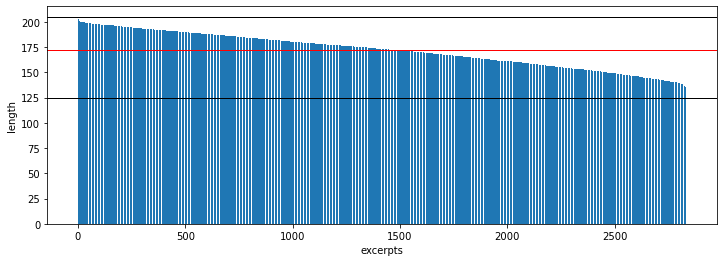

In [20]:
plt.clf()
plt.figure(figsize=(12, 4))

plt.bar(np.arange(len(length)), length_sort)
plt.axhline(y=np.mean(length), linewidth=1, color='red')
plt.axhline(y=np.min(length), linewidth=1, color='black')
plt.axhline(y=np.max(length), linewidth=1, color='black')
plt.xlabel("excerpts")
plt.ylabel("length")

plt.show()

**special characters**

In [21]:
import re

In [22]:
# for non-english, non-number
pattern = re.compile("[^ A-Za-z0-9]")

In [23]:
# for non-common-special characters
pattern2 = re.compile("[ \.\(\)\{\}\[\]\?\"\'\~\-\*\+`'_:;|/,!@#$%^&*<>\n]")

In [24]:
count = []
percent = []
non_common = []

for el in excerpts:
    count_ = 0
    non_common_ = 0
    
    count_ = 0
    for ch in el:
        if pattern.match(ch):
            count_ += 1
            if not pattern2.match(ch):
                non_common_ += 1
            
    count.append(count_)
    percent.append(count_/len(el))
    non_common.append(non_common_)

<Figure size 432x288 with 0 Axes>

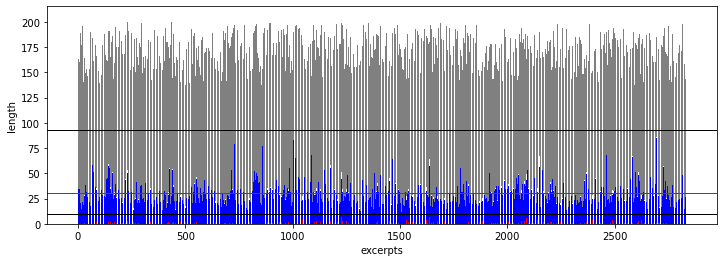

In [25]:
# grey : whole length
# blue : common special characters
# red : non-common special characters

count = np.array(count)
non_common = np.array(non_common)

plt.clf()
plt.figure(figsize=(12, 4))

plt.bar(np.arange(len(count)), non_common, color="red")
plt.bar(np.arange(len(count)), count-non_common, bottom=non_common, color="blue")
plt.bar(np.arange(len(count)), length-count-non_common, 
        bottom=count+non_common, color="grey")
plt.axhline(y=np.mean(count), linewidth=1, color='red')
plt.axhline(y=np.min(count), linewidth=1, color='black')
plt.axhline(y=np.max(count), linewidth=1, color='black')
plt.xlabel("excerpts")
plt.ylabel("length")

plt.show()

In [26]:
# Difference of max value and average value is big.
# So, check the content which has max count value of special tokens.

count_max_index = np.argmax(count)
print(excerpts[count_max_index])

Look! The sun is rising. The birds are chirping. The girls are ready to play.
Chunu says, "Brrr, how cold!"
Munu says, "Yes, so cold!"
Chunu says, "I will wear warm clothes to protect myself from the cold."
"Where's my warm hat?" Chunu wonders.
"It was here yesterday. Where has it gone today?" "I can't find my warm socks!" Munu cries. "Where are my warm socks?"
"My feet are so cold, they're numb!"
"Mine too," Munu tells her sister.
"Brrr, so cold!"
"It's so cold!"
"We can't find my warm hat. We can't find your warm socks.
"Where could our clothes possibly be?" Munu wonders.
"Here is my warm coat!" Chunu says. "But where are my other clothes?"
"Chunu, look here," Munu cries.
"Look into the hole." Chunu and Munu looked inside the hole. They took their socks and warm hat and went to find all their other warm things. Then they would play!


### "excerpt" conclusion

- Variance of length is not big.
    - There is no need to remove extreme value.
    
- Number of words and characters are not big.
    - Number of tokens for training is not bigger than number of characters and no less than number of words(splitted by white space).
    - So, if token vector dimension is bigger than number of words(=205), there is no need to split one sentence(=sequence) to several.
    
- Very neat sentences.
    - The content of each pharagraphs is very general subject. And each sentences do not have special characteristics. 
    - So, it is possible to try remove articles and plurals etc and just remain necessary part of words(like root), but first, try to use raw pharagraph. I believe NN will find out well which part is important. 
    
- There is no reason to remain cappital letter.
    - So, it need to unify as small letter.

## explore "target"

In [40]:
target = use_data["target"]

In [28]:
target = np.array(target)

print("Maximum :", np.max(target))
print("Minimum :", np.min(target))

print("Average :", np.mean(target))
print("Variance :", np.var(target))
print("Standard Deviation :", np.std(target))

Maximum : 1.711389827
Minimum : -3.676267773
Average : -0.9593187699947071
Variance : 1.0679090128994302
Standard Deviation : 1.033396832247627


<Figure size 432x288 with 0 Axes>

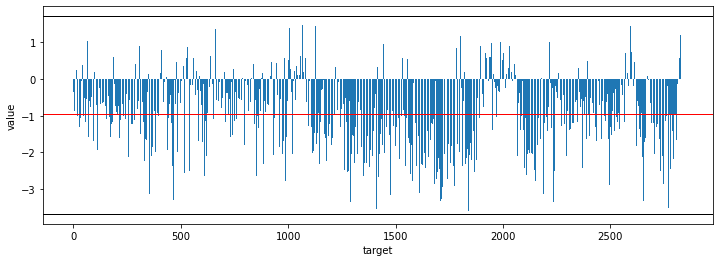

In [29]:
plt.clf()
plt.figure(figsize=(12, 4))

plt.bar(np.arange(len(target)), target)
plt.axhline(y=np.mean(target), linewidth=1, color='red')
plt.axhline(y=np.min(target), linewidth=1, color='black')
plt.axhline(y=np.max(target), linewidth=1, color='black')
plt.xlabel("target")
plt.ylabel("value")

plt.show()

In [31]:
import seaborn as sns

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

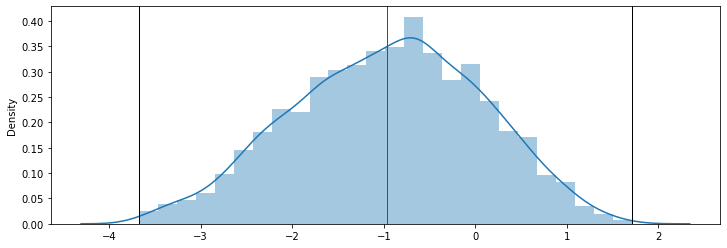

In [37]:
plt.clf()
plt.figure(figsize=(12, 4))

sns.distplot(target)
plt.axvline(x=np.mean(target), linewidth=1, color='red')
plt.axvline(x=np.min(target), linewidth=1, color='black')
plt.axvline(x=np.max(target), linewidth=1, color='black')

plt.show()

## explore "standard_error"

In [42]:
ste = use_data["standard_error"]

In [43]:
ste = np.array(ste)

print("Maximum :", np.max(ste))
print("Minimum :", np.min(ste))

print("Average :", np.mean(ste))
print("Variance :", np.var(ste))
print("Standard Deviation :", np.std(ste))

Maximum : 0.649671297
Minimum : 0.0
Average : 0.49143509098976706
Variance : 0.0012118464302749358
Standard Deviation : 0.03481158471364002


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

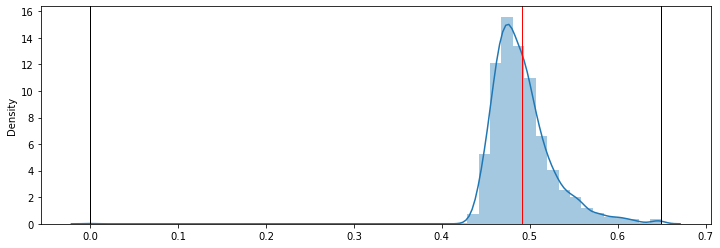

In [44]:
plt.clf()
plt.figure(figsize=(12, 4))

sns.distplot(ste)
plt.axvline(x=np.mean(ste), linewidth=1, color='red')
plt.axvline(x=np.min(ste), linewidth=1, color='black')
plt.axvline(x=np.max(ste), linewidth=1, color='black')

plt.show()

<Figure size 432x288 with 0 Axes>

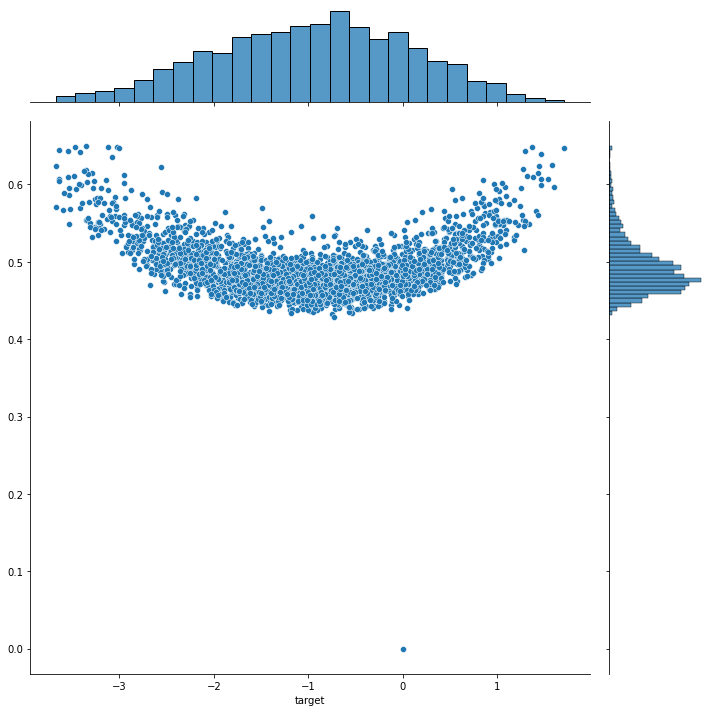

In [57]:
plt.clf()

sns.jointplot(x=target, y=ste, height=10)

plt.show()

In [63]:
# outlier
use_data[use_data["standard_error"] == 0]

,id,excerpt,target,standard_error
106,436ce79fe,"The sun was shining in a cloudless sky, and no...",0.0,0.0


In [69]:
use_data[use_data["standard_error"] == 0].iloc[0]["excerpt"]

'The sun was shining in a cloudless sky, and no shadows lay on the mountain, and all day long they watched and waited, and at last, when the birds were singing their farewell song to the evening star, the children saw the shadows marching from the glen, trooping up the mountain side and dimming the purple of the heather.\nAnd when the mountain top gleamed like a golden spear, they fixed their eyes on the line between the shadow and the sunshine.\n"Now," said Connla, "the time has come."\n"Oh, look! look!" said Nora, and as she spoke, just above the line of shadow a door opened out, and through its portals came a little piper dressed in green and gold. He stepped down, followed by another and another, until they were nine in all, and then the door slung back again.'

In [72]:
# remove outlier
print(len(use_data))
use_data = use_data[use_data["standard_error"] != 0]
print(len(use_data))

2834
2833


In [73]:
target = use_data["target"]
ste = use_data["standard_error"]

<Figure size 432x288 with 0 Axes>

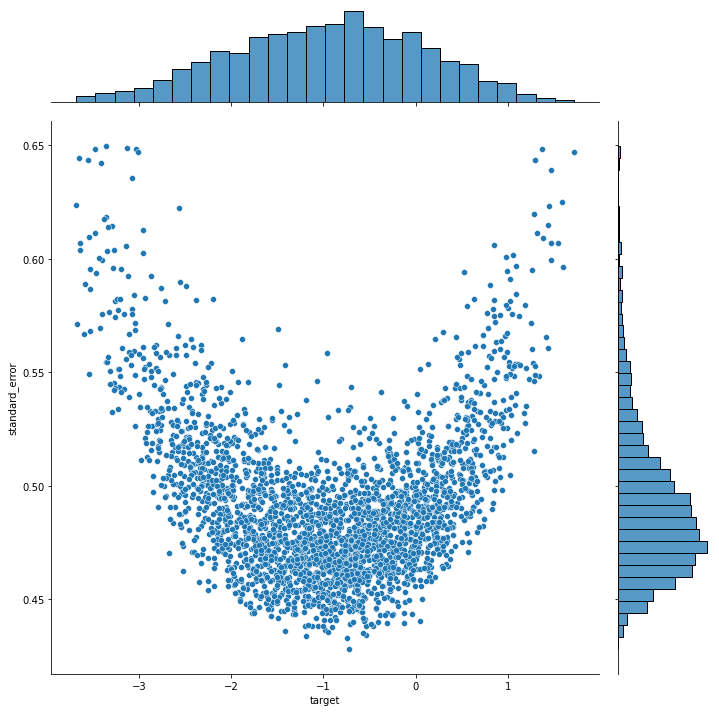

In [74]:
plt.clf()

sns.jointplot(x=target, y=ste, height=10)

plt.show()

## target, standard_error conclusion

- target, standard_error looks like normal distribution.
    - In model architecture, maybe layer normalization or batch normalization can be helpful.
    - Maybe, before getting to the output, normalization is helpful.
    
- Assume that there is one outlier(target==0.0, standard_error==0.0).
    - I think it is helpful to remove it.

## ratio of train, test set

In [77]:
len(use_data)

2833

In [78]:
test = pd.read_csv("data/0_original/test.csv")
len(test)

7

In [79]:
test.head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


## train, test set conclusion
- Maybe from train data, we can get train, test set. And original test set can be used by dev set. 